<a href="https://colab.research.google.com/github/Shivp55/ComputerVision/blob/main/CV_Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import shutil
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Flatten, Dropout, Dense, BatchNormalization
import os
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import random

In [2]:
pip install split-folders

In [3]:
import splitfolders

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

# Source and destination folder paths
source_folder = "/content/drive/MyDrive/imagewoof-320"
destination_folder = "/content/drive/MyDrive/imagewoof_1"

# Copy the folder recursively
shutil.copytree(source_folder, destination_folder)


'/content/drive/MyDrive/imagewoof_1'

##Splitting the Data

In [ ]:
# Define paths to validation and training folders
validation_folder = "/content/drive/MyDrive/imagewoof_1/val"
training_folder = "/content/drive/MyDrive/imagewoof_1/train"

# Iterate over class folders in the validation folder
for class_folder in os.listdir(validation_folder):
    class_folder_path = os.path.join(validation_folder, class_folder)
    if os.path.isdir(class_folder_path):
        # Check if the corresponding class folder exists in the training folder
        training_class_folder_path = os.path.join(training_folder, class_folder)
        if os.path.exists(training_class_folder_path):
            # Iterate over files in the class folder of the validation set
            for file_name in os.listdir(class_folder_path):
                file_path = os.path.join(class_folder_path, file_name)
                # Copy the file to the corresponding class folder in the training set
                shutil.copy(file_path, training_class_folder_path)
            print(f"Files from '{class_folder}' in the validation set copied to training set.")
        else:
            print(f"Corresponding class folder '{class_folder}' does not exist in the training set.")
    else:
        print(f"'{class_folder}' is not a folder.")

print("Copy process completed.")


Files from 'n02111889' in the validation set copied to training set.
Files from 'n02089973' in the validation set copied to training set.
Files from 'n02099601' in the validation set copied to training set.
Files from 'n02087394' in the validation set copied to training set.
Files from 'n02088364' in the validation set copied to training set.
Files from 'n02115641' in the validation set copied to training set.
Files from 'n02086240' in the validation set copied to training set.
Files from 'n02105641' in the validation set copied to training set.
Files from 'n02096294' in the validation set copied to training set.
Files from 'n02093754' in the validation set copied to training set.
Copy process completed.


In [ ]:
# Define paths

data_folder = '/content/drive/MyDrive/imagewoof_1'  # Update this with the path to your data folder
output_folder = '/content/drive/MyDrive/imagewoof_final_split'


train_folder = os.path.join(data_folder, 'train')


# Count number of images in each class folder
class_image_count = {}
for class_folder in os.listdir(train_folder):
    class_path = os.path.join(train_folder, class_folder)
    if os.path.isdir(class_path):  # Check if it's a directory
        num_images = len(os.listdir(class_path))
        class_image_count[class_folder] = num_images

#Sort classes based on the number of images
sorted_classes = sorted(class_image_count.items(), key=lambda x: x[1])

# Delete the classes with the lowest number of images (6 classes)
num_classes_to_delete = 6
classes_to_delete = [class_name for class_name, _ in sorted_classes[:num_classes_to_delete]]

for class_name in classes_to_delete:
    class_path = os.path.join(train_folder, class_name)
    shutil.rmtree(class_path)
    print(f"Deleted class: {class_name}")


# Split data into train, validation, and test sets
splitfolders.ratio(train_folder, output=output_folder, seed=42, ratio=(0.70, 0.15, 0.15))

print("Data processing completed successfully.")


Deleted class: n02089973
Deleted class: n02111889
Deleted class: n02099601
Deleted class: n02088364
Deleted class: n02105641
Deleted class: n02087394


Copying files: 5400 files [02:33, 35.18 files/s]

Data processing completed successfully.


In [5]:
# Define the paths to the ImageNet datasets
dataset_paths = {
    'train': '/content/drive/MyDrive/imagewoof_final_split/train',
    'val': '/content/drive/MyDrive/imagewoof_final_split/val',
    'test': '/content/drive/MyDrive/imagewoof_final_split/test'
}

# Function to count the number of images in each class after splitting
def count_images_per_class(dataset_folder):
    class_counts = {}
    for class_folder in os.listdir(dataset_folder):
        class_path = os.path.join(dataset_folder, class_folder)
        if os.path.isdir(class_path):
            num_images = len(os.listdir(class_path))
            class_counts[class_folder] = num_images
    return class_counts

# Iterate over dataset paths and count images for each
for split, path in dataset_paths.items():
    print(f"Number of images per class in {split} set:")
    class_counts = count_images_per_class(path)
    for class_name, count in class_counts.items():
        print(f"{class_name}: {count}")

Number of images per class in train set:
n02096294: 944
n02086240: 944
n02093754: 944
n02115641: 944
Number of images per class in val set:
n02096294: 202
n02086240: 202
n02093754: 202
n02115641: 202
Number of images per class in test set:
n02096294: 204
n02086240: 204
n02093754: 204
n02115641: 204


In [6]:
#Data Augmentation
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator


#Building a Fine Tuned Model
#generators
batch_size=32

train_datagen= ImageDataGenerator(
      rescale=1./255,
    rotation_range=45,  # Increase rotation range
    shear_range=0.3,    # Increase shear range
    zoom_range=0.3,     # Increase zoom range
    horizontal_flip=True,
    width_shift_range=0.3,
    height_shift_range=0.3
)
val_datagen= ImageDataGenerator(
     rescale=1./255,
    rotation_range=45,  # Increase rotation range
    shear_range=0.3,    # Increase shear range
    zoom_range=0.3,     # Increase zoom range
    horizontal_flip=True,
    width_shift_range=0.3,
    height_shift_range=0.3
)
test_datagen=ImageDataGenerator(rescale=1./255)

In [7]:
#Generate Augmented Data
train_generator=train_datagen.flow_from_directory(
    '/content/drive/MyDrive/imagewoof_final_split/train',
    target_size=(299,299),
    batch_size=32,
    class_mode='categorical'
)
validation_generator = val_datagen.flow_from_directory(
'/content/drive/MyDrive/imagewoof_final_split/val',
 target_size=(299, 299),
 batch_size=32,
 class_mode='categorical')

test_generator=test_datagen.flow_from_directory(
    '/content/drive/MyDrive/imagewoof_final_split/test',
    target_size=(299, 299),
    batch_size=20,
    class_mode='categorical'
)

Found 3776 images belonging to 4 classes.
Found 808 images belonging to 4 classes.
Found 816 images belonging to 4 classes.


In [8]:


# Load InceptionV3 pre-trained model
inception_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(299, 299, 3))

# Freezing all layers
for layer in inception_model.layers:
    layer.trainable = False

# Unfreezing the top 2 Inception blocks (mixed 8 and mixed 9)
for layer in inception_model.layers:
    if 'mixed8' in layer.name or 'mixed9' in layer.name:
        layer.trainable = True

# Add classification layers
x = inception_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(4, activation='softmax')(x)

# Create the model
model = Model(inputs=inception_model.input, outputs=predictions)

# Compile the model
optimizer = Adam(learning_rate=0.001)  # Adjust learning rate as needed
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Display the model summary
model.summary()


87910968/87910968 [==============================] - 1s 0us/step
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 299, 299, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 149, 149, 32)         864       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 149, 149, 32)         96        ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     

In [9]:
#compile
model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])

In [10]:
history1=model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=None
)

<ipython-input-10-206a1d09440d>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history1=model.fit_generator(


Epoch 1/10
100/100 [==============================] - 1266s 13s/step - loss: 0.3355 - accuracy: 0.8966 - val_loss: 0.1291 - val_accuracy: 0.9517
Epoch 2/10
100/100 [==============================] - 1132s 11s/step - loss: 0.1442 - accuracy: 0.9491 - val_loss: 0.2371 - val_accuracy: 0.9158
Epoch 3/10
100/100 [==============================] - 1114s 11s/step - loss: 0.1478 - accuracy: 0.9478 - val_loss: 0.1648 - val_accuracy: 0.9480
Epoch 4/10
100/100 [==============================] - 1110s 11s/step - loss: 0.1346 - accuracy: 0.9516 - val_loss: 0.1412 - val_accuracy: 0.9493
Epoch 5/10
100/100 [==============================] - 1103s 11s/step - loss: 0.1268 - accuracy: 0.9569 - val_loss: 0.1275 - val_accuracy: 0.9517
Epoch 6/10
100/100 [==============================] - 1100s 11s/step - loss: 0.1068 - accuracy: 0.9578 - val_loss: 0.1271 - val_accuracy: 0.9629
Epoch 7/10
100/100 [==============================] - 1093s 11s/step - loss: 0.1288 - accuracy: 0.9581 - val_loss: 0.1472 - val_ac

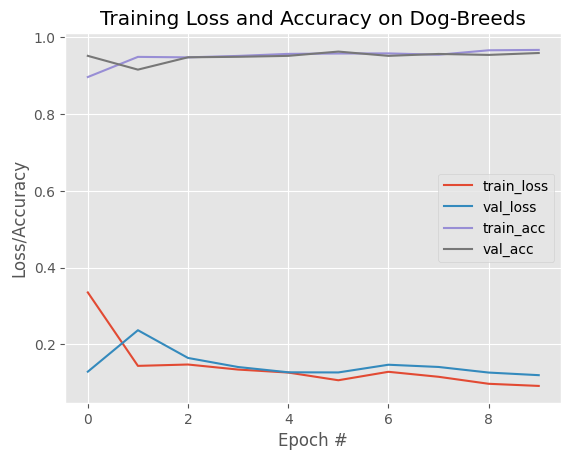

In [11]:
plt.style.use("ggplot")
plt.figure()
plt.plot(history1.history["loss"], label="train_loss")
plt.plot(history1.history["val_loss"], label="val_loss")
plt.plot(history1.history["accuracy"], label="train_acc")
plt.plot( history1.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy on Dog-Breeds")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()

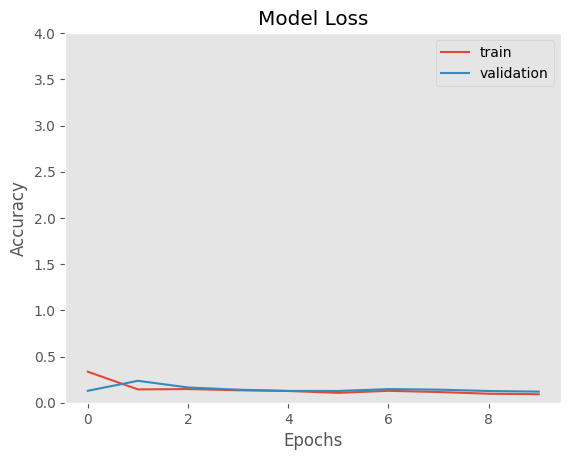

In [12]:
#Baseline model performance graph
Model_Accuracy = plt.gcf()
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.axis(ymin=0,ymax=4)
plt.grid()
plt.title('Model Loss')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

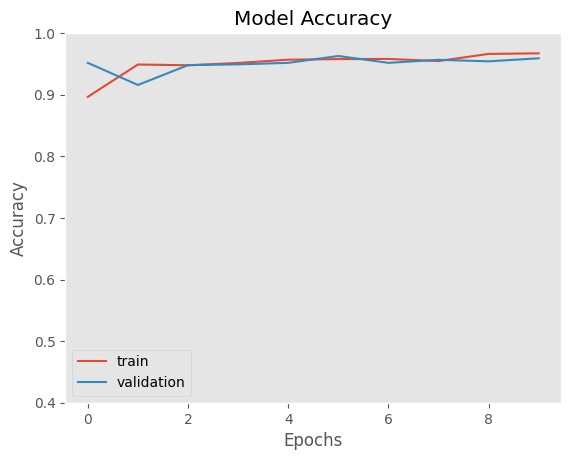

In [13]:
#Baseline model performance graph
Model_Accuracy = plt.gcf()
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

In [14]:
test_generator = test_datagen.flow_from_directory(
 '/content/drive/MyDrive/imagewoof_final_split/test',
 target_size=(299, 299),
 batch_size=16,
 class_mode='categorical')
results = model.evaluate_generator(
 test_generator,
 steps=100)
print('Final test accuracy:', (results[1]*100.0))

Found 816 images belonging to 4 classes.


<ipython-input-14-d22c8f6dc951>:6: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  results = model.evaluate_generator(


Final test accuracy: 98.03921580314636


51/51 [==============================] - 201s 4s/step


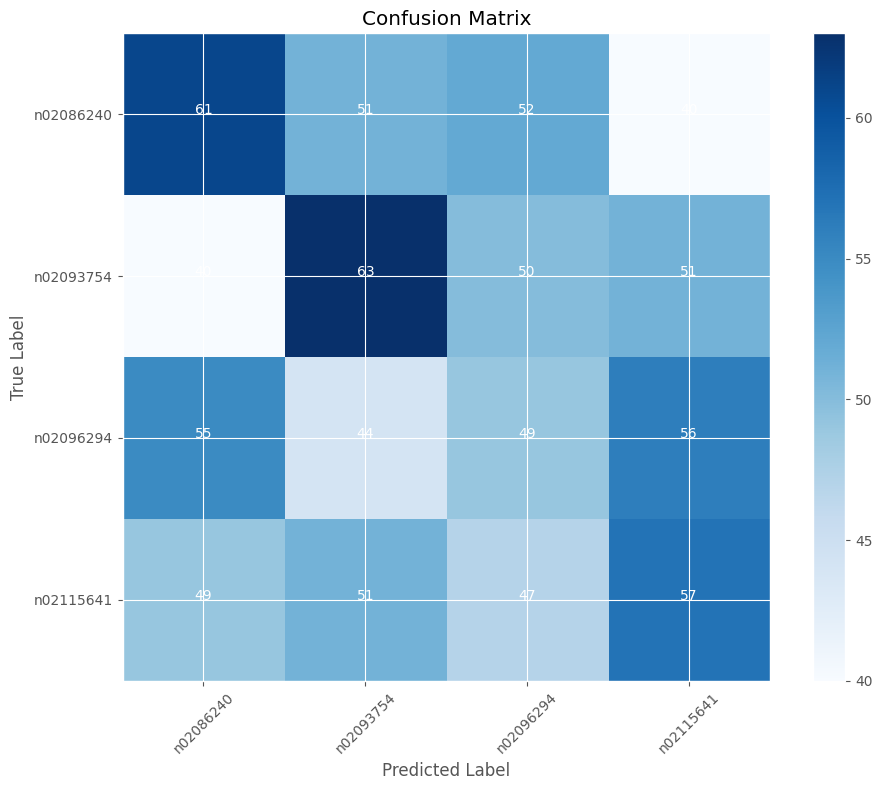

In [15]:
# Generate predictions on the test set
from sklearn.metrics import confusion_matrix
y_pred = model.predict(test_generator)

# Convert predictions from one-hot encoded format to class labels
y_pred_labels = np.argmax(y_pred, axis=1)

# Get true labels from the validation data generator
true_labels = test_generator.classes

# Compute confusion matrix
conf_matrix = confusion_matrix(true_labels, y_pred_labels)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
plt.imshow(conf_matrix, cmap='Blues')

# Add title and axis labels
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Add tick marks and labels
tick_marks = np.arange(len(test_generator.class_indices))
plt.xticks(tick_marks, test_generator.class_indices, rotation=45)
plt.yticks(tick_marks, test_generator.class_indices)

# Add text annotations
thresh = conf_matrix.max() / 2.0
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j, i, format(conf_matrix[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if conf_matrix[i, j] > thresh else "black")

# Show plot
plt.colorbar()
plt.tight_layout()
plt.show()


In [16]:
#Saving baseline model as h5 format
model.save('/content/drive/MyDrive/models/Fine_tuned_InceptionV13.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 [==============================] - 2s 2s/step
Predicted item Class: 0


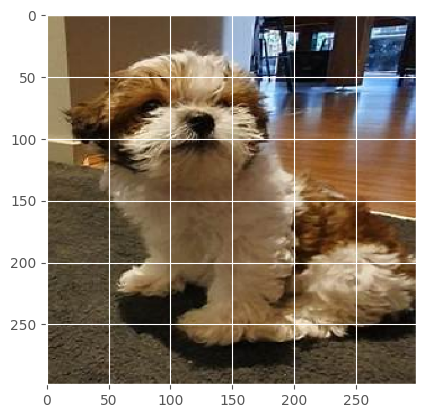

In [17]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model
import numpy as np

# Load the model
model = load_model('/content/drive/MyDrive/models/Fine_tuned_InceptionV3.h5')

#Defining names of the classes:
#Class[0] - label(n02086240)- Shih Tzu
#Class[1] - label(n02093754)- Border Terrier
#Class[2] - label(n02096294)- Australian Terrier
#Class[3] - label(n02115641)- Albino Dingo


# Load image and turn value to array

img = load_img('/content/drive/MyDrive/dog_images/shih_tzu_0.jpeg', target_size=(299, 299))

x = img_to_array(img)
x = np.expand_dims(x, axis=0)
x /= 255.0
preds = model.predict(x)
print('Predicted item Class:', np.argmax(preds[0]))
# Print the predicted class

plt.imshow(img)
plt.show()

1/1 [==============================] - 0s 250ms/step


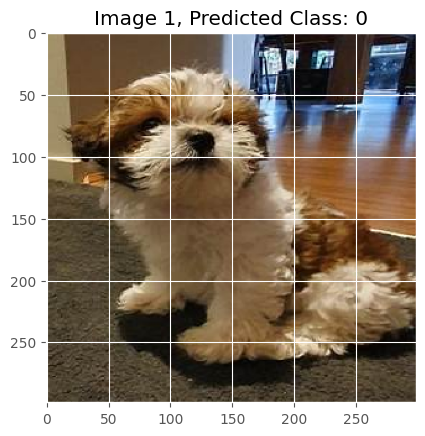

1/1 [==============================] - 0s 264ms/step


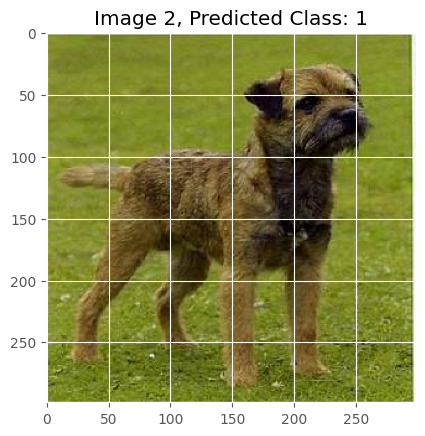

1/1 [==============================] - 0s 234ms/step


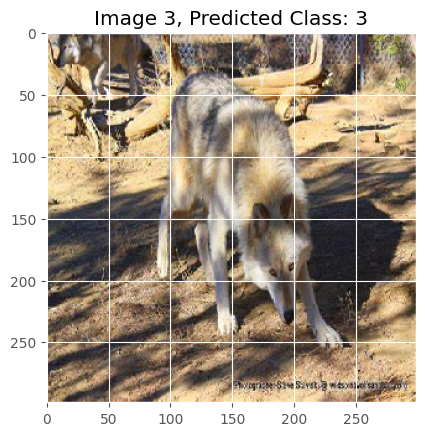

1/1 [==============================] - 0s 231ms/step


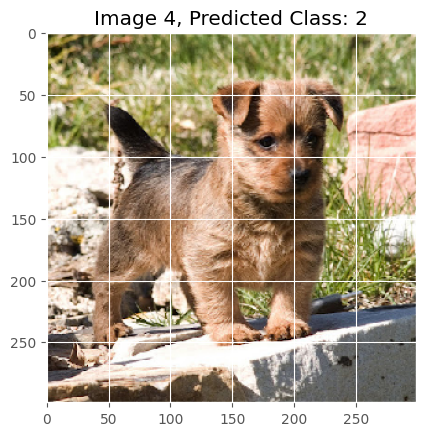

In [18]:
# List of image paths
image_paths = [
    '/content/drive/MyDrive/dog_images/shih_tzu_0.jpeg',
    '/content/drive/MyDrive/dog_images/Border_terrier_1.jpeg',
    '/content/drive/MyDrive/dog_images/Dingo_3.jpeg',
    '/content/drive/MyDrive/dog_images/Australian_Terrier_2.jpeg',
]

# Iterate over each image path
for i, path in enumerate(image_paths, 1):
    # Load and process the image
    img = load_img(path, target_size=(299, 299))
    x = img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x /= 255.0

    # Predict using the model
    preds = model.predict(x)
    predicted_class = np.argmax(preds[0])

    # Display the image and predicted class
    plt.figure()
    plt.imshow(img)
    plt.title(f'Image {i}, Predicted Class: {predicted_class}')
    plt.show()